In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from scipy import stats
import krippendorff
import matplotlib.pyplot as plt

In [3]:
results_df = pd.read_parquet("experiments/promptvariations_accuracy_12:57:40_30.05/results.parquet")
print(len(results_df))
results_df["llm_decision"].value_counts()
results_df

4800


,experiment_id,combination_id,datapoint_idx,dataset_index,true_outcome,predicted_outcome,llm_decision,reasoning_length,processing_time,total_tokens,tokens_per_second,final_prompt_type_category,final_prompt_type_value,accuracy
0,promptvariations_accuracy,0,0,8723,Check-Out,Check-Out,Check-Out,0,0.443777,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,50.05
1,promptvariations_accuracy,0,1,10233,Check-Out,Check-Out,Check-Out,0,0.698334,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,50.05
2,promptvariations_accuracy,0,2,52028,Cancellation,Cancellation,Check-Out,0,0.959475,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,50.05
3,promptvariations_accuracy,0,3,16948,Check-Out,Cancellation,Check-Out,0,1.229122,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,50.05
4,promptvariations_accuracy,0,4,16376,Check-Out,Check-Out,Check-Out,0,1.507977,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,50.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,promptvariations_accuracy,159,25,84583,Check-Out,Check-Out,Check-Out,727,12355.470765,0,0.0,ai_trust,You are the decision authority for a hotel boo...,94.56
4796,promptvariations_accuracy,159,26,96373,Check-Out,Cancellation,Cancellation,758,12357.285113,0,0.0,ai_trust,You are the decision authority for a hotel boo...,94.56
4797,promptvariations_accuracy,159,27,99102,Check-Out,Check-Out,Check-Out,730,12359.394204,0,0.0,ai_trust,You are the decision authority for a hotel boo...,94.56
4798,promptvariations_accuracy,159,28,106685,Check-Out,Check-Out,Check-Out,852,12361.118222,0,0.0,ai_trust,You are the decision authority for a hotel boo...,94.56


In [7]:
results_df2 = pd.read_parquet("experiments/prompt_variations_exclusion_shap-lime/results.parquet")
print(len(results_df2))
results_df2["llm_decision"].value_counts()
results_df2

3840


,experiment_id,combination_id,datapoint_idx,dataset_index,true_outcome,predicted_outcome,llm_decision,reasoning_length,processing_time,total_tokens,tokens_per_second,final_prompt_type_category,final_prompt_type_value,xai_exclusion_shap,xai_exclusion_lime_explanation
0,prompt_variations_order_permutation,0,0,8723,Check-Out,Check-Out,Check-Out,0,0.557852,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,False,False
1,prompt_variations_order_permutation,0,1,10233,Check-Out,Check-Out,Check-Out,0,0.220571,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,False,False
2,prompt_variations_order_permutation,0,2,52028,Cancellation,Cancellation,Cancellation,0,0.232516,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,False,False
3,prompt_variations_order_permutation,0,3,16948,Check-Out,Cancellation,Cancellation,0,0.255300,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,False,False
4,prompt_variations_order_permutation,0,4,16376,Check-Out,Check-Out,Check-Out,0,0.263443,0,0.0,direct_answers,Above is data with XAI methods from a hotel bo...,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,prompt_variations_order_permutation,127,25,84583,Check-Out,Check-Out,Check-Out,0,0.248418,0,0.0,ai_distrust,Above is data with XAI methods from a hotel bo...,True,True
3836,prompt_variations_order_permutation,127,26,96373,Check-Out,Cancellation,Check-Out,0,0.247272,0,0.0,ai_distrust,Above is data with XAI methods from a hotel bo...,True,True
3837,prompt_variations_order_permutation,127,27,99102,Check-Out,Check-Out,Check-Out,0,0.240119,0,0.0,ai_distrust,Above is data with XAI methods from a hotel bo...,True,True
3838,prompt_variations_order_permutation,127,28,106685,Check-Out,Check-Out,Check-Out,0,1.289786,0,0.0,ai_distrust,Above is data with XAI methods from a hotel bo...,True,True


In [15]:
print(f'{results_df["processing_time"].mean():.3f}+-{results_df["processing_time"].std():.3f} seconds')

1.755+-2.076 seconds


In [4]:
from rixeval.analysis import ResultAnalyzer
pd.set_option("display.precision", 4)
analyzer = ResultAnalyzer(results_df)
summary = analyzer.analyze_all_combinations()
summary

/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: Runtime

,percent_correct,percent_agree_ai,corr_true_llm,corr_predicted_llm,avg_processing_time,final_prompt_type_category,final_prompt_type_value,accuracy
0,66.6667,70.0000,0.2075,0.4082,4.3452,direct_answers,Above is data with XAI methods from a hotel bo...,50.05
1,70.0000,80.0000,0.3113,0.6124,14.4623,direct_answers,Above is data with XAI methods from a hotel bo...,65.46
2,63.3333,86.6667,0.1668,0.7385,50.2614,direct_answers,Above is data with XAI methods from a hotel bo...,80.68
3,63.3333,86.6667,0.1668,0.7385,74.6363,direct_answers,Above is data with XAI methods from a hotel bo...,94.56
4,66.6667,63.3333,0.2441,0.2274,97.3457,direct_answers,You are the final decision-maker in a hotel bo...,50.05
...,...,...,...,...,...,...,...,...
155,73.3333,96.6667,0.4513,0.9337,12142.3007,ai_trust,Your role involves making critical decisions a...,94.56
156,70.0000,100.0000,0.3671,1.0000,12196.9612,ai_trust,You are the decision authority for a hotel boo...,50.05
157,70.0000,100.0000,0.3671,1.0000,12242.6706,ai_trust,You are the decision authority for a hotel boo...,65.46
158,70.0000,100.0000,0.3671,1.0000,12293.8018,ai_trust,You are the decision authority for a hotel boo...,80.68


In [38]:
analyzer2 = ResultAnalyzer(results_df2)
summary2 = analyzer2.analyze_all_combinations()
summary2

,percent_correct,percent_agree_ai,corr_true_llm,corr_predicted_llm,avg_processing_time,final_prompt_type_category,final_prompt_type_value,xai_exclusion_pdp,xai_exclusion_histogram
0,70.0000,93.3333,0.3424,0.8660,0.2539,direct_answers,Above is data with XAI methods from a hotel bo...,False,False
1,66.6667,90.0000,0.2566,0.8018,0.2595,direct_answers,Above is data with XAI methods from a hotel bo...,True,False
2,66.6667,90.0000,0.2566,0.8018,0.2545,direct_answers,Above is data with XAI methods from a hotel bo...,False,True
3,66.6667,90.0000,0.2566,0.8018,0.2626,direct_answers,Above is data with XAI methods from a hotel bo...,True,True
4,70.0000,100.0000,0.3671,1.0000,1.0682,direct_answers,Above is data with XAI methods from a hotel bo...,False,False
...,...,...,...,...,...,...,...,...,...
123,63.3333,73.3333,0.1383,0.4423,0.4694,ai_distrust,Above is data with XAI methods from a hotel bo...,True,True
124,66.6667,90.0000,0.2566,0.8018,0.3215,ai_distrust,Above is data with XAI methods from a hotel bo...,False,False
125,66.6667,83.3333,0.2344,0.6757,0.7909,ai_distrust,Above is data with XAI methods from a hotel bo...,True,False
126,66.6667,90.0000,0.2566,0.8018,0.3285,ai_distrust,Above is data with XAI methods from a hotel bo...,False,True


[]

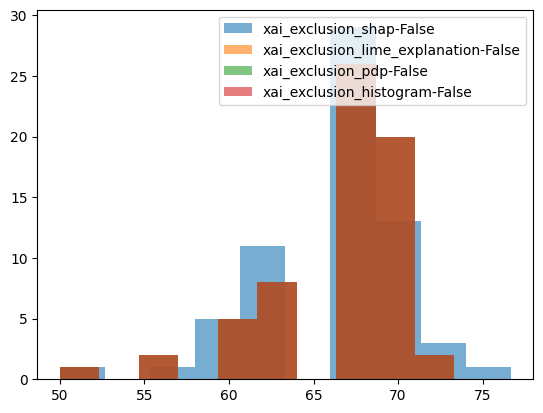

In [50]:
key = "xai_exclusion_shap"
for i in summary[key].unique():
    df = summary[summary[key] == i]
    plt.hist(df["percent_correct"], label=f"{key}-{i}", bins=10, stacked=False,alpha=0.6)
    break
key = "xai_exclusion_lime_explanation"
for i in summary[key].unique():
    df = summary[summary[key] == i]
    plt.hist(df["percent_correct"], label=f"{key}-{i}", bins=10, stacked=False,alpha=0.6)
    break
key = "xai_exclusion_pdp"
for i in summary2[key].unique():
    df2 = summary2[summary2[key] == i]
    plt.hist(df["percent_correct"], label=f"{key}-{i}", bins=10, stacked=False,alpha=0.6)
    break
key = "xai_exclusion_histogram"
for i in summary2[key].unique():
    df2 = summary2[summary2[key] == i]
    plt.hist(df["percent_correct"], label=f"{key}-{i}", bins=10,stacked=False, alpha=0.6)
    break
plt.legend(loc="best")
plt.plot()

In [7]:
comparison = analyzer.compare_parameters("final_prompt_type_category")
comparison = comparison.round(4)
comparison

/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/finn/.pyenv/versions/rixaweb/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: Runtime

,final_prompt_type_category,n_combinations,avg_percent_correct,std_dev_percent_correct,avg_percent_agree_ai,std_dev_percent_agree_ai,krippendorff_alpha,avg_corr_true_llm,std_dev_corr_true_llm,avg_corr_predicted_llm,std_dev_corr_predicted_llm
0,direct_answers,32,68.8542,3.3451,89.4792,10.3040,0.7366,0.3022,0.1144,0.7882,0.2117
1,cot,32,65.0000,11.3907,80.4167,17.4082,0.4012,0.2652,0.1971,0.6160,0.3256
2,emotional_tone,32,66.6667,3.2791,71.0417,11.8363,0.3567,0.2591,0.1035,0.4297,0.2701
3,ai_distrust,32,65.0000,5.9267,72.7083,13.0738,0.3406,0.2012,0.1679,0.4323,0.3026
4,ai_trust,32,69.8958,3.1091,95.3125,6.5506,0.8362,0.3523,0.0833,0.9074,0.1280


In [55]:
comparison = analyzer2.compare_parameters("xai_exclusion_histogram")
comparison = comparison.round(4)
comparison

,xai_exclusion_histogram,n_combinations,avg_percent_correct,std_dev_percent_correct,avg_percent_agree_ai,std_dev_percent_agree_ai,krippendorff_alpha,avg_corr_true_llm,std_dev_corr_true_llm,avg_corr_predicted_llm,std_dev_corr_predicted_llm
0,False,64,66.4583,4.1094,85.6250,9.2176,0.6481,0.2478,0.1157,0.7136,0.1887
1,True,64,67.1875,4.4531,85.1042,9.7945,0.6289,0.2643,0.1262,0.7034,0.2025


In [51]:
comparison = analyzer.compare_parameters("xai_exclusion_shap")
comparison = comparison.round(4)
comparison

,xai_exclusion_shap,n_combinations,avg_percent_correct,std_dev_percent_correct,avg_percent_agree_ai,std_dev_percent_agree_ai,krippendorff_alpha,avg_corr_true_llm,std_dev_corr_true_llm,avg_corr_predicted_llm,std_dev_corr_predicted_llm
0,False,64,66.3021,4.1624,84.0104,10.5272,0.5782,0.2409,0.1211,0.6782,0.2231
1,True,64,67.3958,4.2608,91.5625,7.4172,0.7561,0.2846,0.1081,0.8293,0.1532


In [26]:
comparison = analyzer.compare_parameters("xai_exclusion_lime_explanation")
comparison = comparison.round(4)
comparison

,xai_exclusion_lime_explanation,n_combinations,avg_percent_correct,std_dev_percent_correct,avg_percent_agree_ai,std_dev_percent_agree_ai,krippendorff_alpha,avg_corr_true_llm,std_dev_corr_true_llm,avg_corr_predicted_llm,std_dev_corr_predicted_llm
0,False,64,66.4062,4.1703,88.5938,9.7555,0.6810,0.2546,0.1203,0.7715,0.2007
1,True,64,67.2917,4.2776,86.9792,9.9153,0.6376,0.2708,0.1128,0.7360,0.2095


In [53]:
comparison = analyzer.compare_parameters("final_prompt_type_category")
comparison = comparison.round(4)
comparison

,final_prompt_type_category,n_combinations,avg_percent_correct,std_dev_percent_correct,avg_percent_agree_ai,std_dev_percent_agree_ai,krippendorff_alpha,avg_corr_true_llm,std_dev_corr_true_llm,avg_corr_predicted_llm,std_dev_corr_predicted_llm
0,direct_answers,32,69.0625,2.7086,96.5625,4.8256,0.8798,0.3440,0.0712,0.9340,0.0849
1,cot,32,66.3542,4.1787,88.2292,7.9417,0.6708,0.2472,0.1128,0.7646,0.1591
2,emotional_tone,32,67.3958,3.4635,82.3958,9.3607,0.6179,0.2614,0.0980,0.6477,0.1919
3,ai_distrust,32,64.5833,5.0623,83.9583,9.8533,0.6720,0.1983,0.1294,0.6687,0.2243


Avg. agreement rate for direct_answers: 0.9476+0.1194
Krippendorff's Alpha for direct_answers: 0.8152

Avg. agreement rate for cot: 0.9000+0.1571
Krippendorff's Alpha for cot: 0.6166

Avg. agreement rate for emotional_tone: 0.9429+0.0948
Krippendorff's Alpha for emotional_tone: 0.4441

Avg. agreement rate for ai_distrust: 0.9476+0.1074
Krippendorff's Alpha for ai_distrust: 0.5465



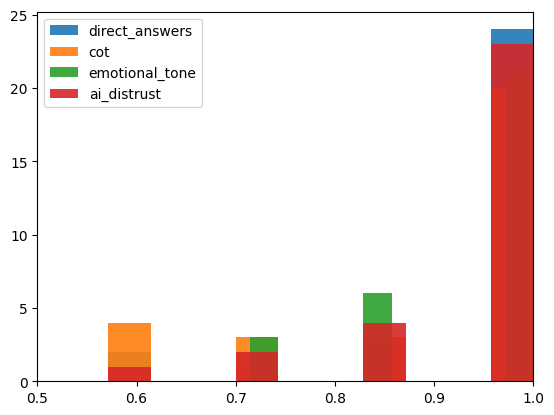

In [59]:
for i in results_df["final_prompt_type_category"].unique():
    df = results_df[results_df["final_prompt_type_category"]==i].drop(["final_prompt_type_category", "reasoning_length", "final_prompt_type_value", "processing_time",], axis=1)
    df = df.drop(["dataset_index", "combination_id", "experiment_id"], axis=1)
    x = calculate_agreement_rate(df)
    plt.hist(x, label=i, bins=10, alpha=0.9)
    plt.xlim(0.5, 1)
    k_alpha = calculate_krippendorff_alpha(df)
    print(f"Avg. agreement rate for {i}: {x.mean():.4f}+{x.std():.4f}")
    print(f"Krippendorff's Alpha for {i}: {k_alpha:.4f}")
    print()
plt.legend(loc="best")
plt.show()


In [47]:
import pandas as pd
import numpy as np
from scipy import stats
import krippendorff

def calculate_agreement_rate(df):
    """
    Calculate agreement rate per datapoint (proportion matching majority vote)
    Range: 0.5 (random) to 1.0 (perfect consistency)
    """
    consistency_scores = []

    for datapoint_idx in df['datapoint_idx'].unique():
        decisions = df[df['datapoint_idx'] == datapoint_idx]['llm_decision']

        # Count each decision type
        decision_counts = decisions.value_counts()
        majority_count = decision_counts.max()
        total_decisions = len(decisions)

        # Agreement rate = proportion that matches majority
        agreement_rate = majority_count / total_decisions
        consistency_scores.append(agreement_rate)

    return np.array(consistency_scores)

def calculate_variance_based_consistency(df):
    """
    Variance-based consistency measure
    Range: 0 (maximum disagreement) to 1 (perfect consistency)
    """
    consistency_scores = []

    for datapoint_idx in df['datapoint_idx'].unique():
        decisions = df[df['datapoint_idx'] == datapoint_idx]['llm_decision']

        # Convert to binary (assuming 'Check-Out' = 1, 'Cancellation' = 0)
        binary_decisions = (decisions == 'Check-Out').astype(int)
        p = binary_decisions.mean()  # proportion of positive decisions

        # Consistency = 1 - 4p(1-p)
        consistency = 1 - 4 * p * (1 - p)
        consistency_scores.append(consistency)

    return np.array(consistency_scores)

def calculate_entropy_based_consistency(df):
    """
    Entropy-based consistency measure
    Range: 0 (maximum disagreement) to 1 (perfect consistency)
    """
    consistency_scores = []

    for datapoint_idx in df['datapoint_idx'].unique():
        decisions = df[df['datapoint_idx'] == datapoint_idx]['llm_decision']

        # Convert to binary
        binary_decisions = (decisions == 'Check-Out').astype(int)
        p = binary_decisions.mean()

        # Handle edge cases
        if p == 0 or p == 1:
            entropy = 0
        else:
            entropy = -p * np.log2(p) - (1-p) * np.log2(1-p)

        # Consistency = 1 - H(p)/log(2)
        consistency = 1 - entropy
        consistency_scores.append(consistency)

    return np.array(consistency_scores)


def calculate_krippendorff_alpha_per_datapoint(df):
    """
    Calculate Krippendorff's Alpha per datapoint
    Returns array of alpha values, one per datapoint

    Note: This is somewhat unconventional since Alpha is typically used
    for multiple items, but it can be meaningful for measuring agreement
    among prompt variations for each individual datapoint.
    """
    alpha_scores = []

    for datapoint_idx in df['datapoint_idx'].unique():
        decisions = df[df['datapoint_idx'] == datapoint_idx]['llm_decision'].tolist()

        # Convert to numeric (1 for Check-Out, 0 for Cancellation)
        numeric_decisions = [1 if d == 'Check-Out' else 0 for d in decisions]

        # For a single item with multiple raters, we create a matrix
        # where each rater (prompt variation) is a row, and we have one column (the item)
        reliability_data = np.array(numeric_decisions).reshape(-1, 1)

        try:
            # Calculate alpha for this single datapoint
            alpha = krippendorff.alpha(reliability_data.T, level_of_measurement='nominal')

            # Handle the case where all decisions are the same (perfect agreement)
            # Krippendorff's alpha might return NaN in this case
            if np.isnan(alpha):
                # If all values are the same, we have perfect agreement
                if len(set(numeric_decisions)) == 1:
                    alpha = 1.0
                else:
                    alpha = 0.0

        except Exception as e:
            raise e
            # Fallback: calculate simple agreement
            unique_decisions = len(set(numeric_decisions))
            if unique_decisions == 1:
                alpha = 1.0  # Perfect agreement
            else:
                # Calculate proportion of majority class as fallback
                majority_count = max(numeric_decisions.count(0), numeric_decisions.count(1))
                alpha = (2 * majority_count - len(numeric_decisions)) / len(numeric_decisions)

        alpha_scores.append(alpha)

    return np.array(alpha_scores)

def calculate_fleiss_kappa(df):
    """
    Calculate Fleiss' Kappa (requires equal number of raters per item)
    """
    from sklearn.metrics import cohen_kappa_score

    # Check if all datapoints have same number of decisions
    counts = df['datapoint_idx'].value_counts()
    if not all(counts == counts.iloc[0]):
        print("Warning: Fleiss' Kappa requires equal number of raters per item")
        return None

    # Create agreement matrix
    datapoints = df['datapoint_idx'].unique()
    n_raters = counts.iloc[0]

    # Count agreements for each datapoint
    agreement_matrix = []

    for datapoint_idx in datapoints:
        decisions = df[df['datapoint_idx'] == datapoint_idx]['llm_decision']
        checkout_count = sum(decisions == 'Check-Out')
        cancellation_count = sum(decisions == 'Cancellation')
        agreement_matrix.append([checkout_count, cancellation_count])

    agreement_matrix = np.array(agreement_matrix)

    # Calculate Fleiss' Kappa manually
    N = len(datapoints)  # number of subjects
    n = n_raters  # number of raters
    k = 2  # number of categories

    # Calculate P_i (proportion of agreement for each subject)
    P_i = []
    for i in range(N):
        sum_squares = sum(agreement_matrix[i]**2)
        P_i.append((sum_squares - n) / (n * (n - 1)))

    P_bar = np.mean(P_i)  # average proportion of agreement

    # Calculate P_j (proportion of ratings in each category)
    P_j = np.sum(agreement_matrix, axis=0) / (N * n)

    # Calculate expected agreement
    P_e = np.sum(P_j**2)

    # Fleiss' Kappa
    kappa = (P_bar - P_e) / (1 - P_e)

    return kappa

# Example usage and summary function
def analyze_consistency(df):
    """
    Calculate all consistency metrics and return summary
    """
    print("=== LLM Decision Consistency Analysis ===\n")

    # Per-datapoint metrics
    agreement_rates = calculate_agreement_rate(df)
    variance_consistency = calculate_variance_based_consistency(df)
    entropy_consistency = calculate_entropy_based_consistency(df)

    print("Per-datapoint metrics (averaged):")
    print(f"Agreement Rate: {agreement_rates}")
    print(f"Variance-based: {variance_consistency}")
    print(f"Entropy-based: {entropy_consistency}")

    # Overall metrics
    try:
        alpha = calculate_krippendorff_alpha(df)
        print(f"\nOverall dataset metrics:")
        print(f"Krippendorff's Alpha: {alpha:.3f}")
    except:
        print("\nCould not calculate Krippendorff's Alpha (may need to install krippendorff package)")

    try:
        kappa = calculate_fleiss_kappa(df)
        if kappa is not None:
            print(f"Fleiss' Kappa: {kappa:.3f}")
    except Exception as e:
        print(f"Could not calculate Fleiss' Kappa: {e}")

    # Return detailed results
    results = {
        'agreement_rates': agreement_rates,
        'variance_consistency': variance_consistency,
        'entropy_consistency': entropy_consistency,
        'mean_agreement_rate': agreement_rates.mean(),
        'mean_variance_consistency': variance_consistency.mean(),
        'mean_entropy_consistency': entropy_consistency.mean()
    }

    return results